In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('data/Train_awoL0xl.csv')
test = pd.read_csv('data/Test_QQKW4dv.csv')
ss = pd.read_csv('data/SampleSubmission_ZxsCq0O.csv')

In [7]:
train.head()

,ID,stock,Date,Open,High,Low,Close,holiday,unpredictability_score
0,id_0,0,2017-01-03,82.9961,82.7396,82.9144,82.8101,1,7
1,id_1,0,2017-01-04,83.1312,83.1669,83.3779,82.9690,0,7
2,id_2,0,2017-01-05,82.6622,82.7634,82.8984,82.8578,0,7
3,id_3,0,2017-01-06,83.0279,82.7950,82.8425,82.7385,0,7
4,id_4,0,2017-01-09,82.3761,82.0828,82.1473,81.8641,0,7


In [8]:
test.head()

,ID,stock,Date,holiday,unpredictability_score
0,id_713,0,2019-11-01,0,7
1,id_714,0,2019-11-04,0,7
2,id_715,0,2019-11-05,0,7
3,id_716,0,2019-11-06,0,7
4,id_717,0,2019-11-07,0,7


In [9]:
train.shape,test.shape

((73439, 9), (4223, 5))

In [11]:
ID_COL, TARGET_COL = 'id', 'Close'

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


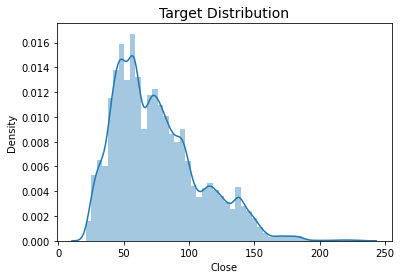

In [12]:
_ = sns.distplot(train[TARGET_COL])
_ = plt.title("Target Distribution", fontsize=14)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73439 entries, 0 to 73438
Data columns (total 9 columns):
ID                        73439 non-null object
stock                     73439 non-null int64
Date                      73439 non-null object
Open                      73439 non-null float64
High                      73439 non-null float64
Low                       73439 non-null float64
Close                     73439 non-null float64
holiday                   73439 non-null int64
unpredictability_score    73439 non-null int64
dtypes: float64(4), int64(3), object(2)
memory usage: 5.0+ MB


In [14]:
null_values_per_variable = 100 * (train.isnull().sum()/train.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending=False)

unpredictability_score    0.0
holiday                   0.0
Close                     0.0
Low                       0.0
High                      0.0
Open                      0.0
Date                      0.0
stock                     0.0
ID                        0.0
dtype: float64

In [15]:
train.nunique()

ID                        73439
stock                       103
Date                        713
Open                      60702
High                      60594
Low                       61015
Close                     60352
holiday                       2
unpredictability_score       10
dtype: int64

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


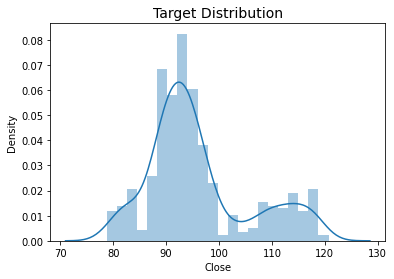

In [16]:
fltr = train['stock'] == 0
_ = sns.distplot(train[fltr][TARGET_COL])
_ = plt.title("Target Distribution", fontsize=14)

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


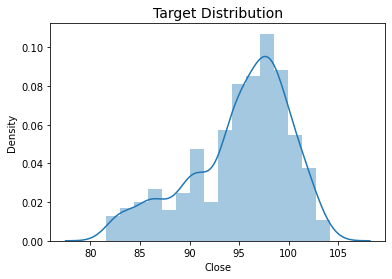

In [17]:
fltr = train['stock'] == 57
_ = sns.distplot(train[fltr][TARGET_COL])
_ = plt.title("Target Distribution", fontsize=14)

In [18]:
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
  return mean_squared_error(y_true, y_pred) ** 0.5

In [20]:
def download_preds(preds_test, file_name = 'hacklive_sub.csv'):

  ## 1. Setting the target column with our obtained predictions
  ss[TARGET_COL] = preds_test

  ## 2. Saving our predictions to a csv file

  ss.to_csv(file_name, index = False)

#   ## 3. Downloading and submitting the csv file
#   from google.colab import files
#   files.download(file_name)